# Imports

In [1]:
import pickle
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *

# Datasets

In [37]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# LSTM - pre-COVID

In [77]:
df_time_features_pre_COVID = df_time_features_pre_COVID.dropna().reset_index(drop=True)

In [78]:
df_time_features_pre_COVID

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,2.0,18.0,23.0,44.0,13.0,13.0,8.0,9.0,7.0,18.0,...,0,0,0,0,0,0,1,0,0,0
1,18.0,23.0,44.0,63.0,2.0,13.0,13.0,8.0,9.0,7.0,...,0,0,0,0,0,0,1,0,0,0
2,23.0,44.0,63.0,56.0,18.0,2.0,13.0,13.0,8.0,9.0,...,0,0,0,0,0,0,1,0,0,0
3,44.0,63.0,56.0,42.0,23.0,18.0,2.0,13.0,13.0,8.0,...,0,0,0,0,0,0,1,0,0,0
4,63.0,56.0,42.0,71.0,44.0,23.0,18.0,2.0,13.0,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,4789.0,4654.0,3989.0,3656.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,...,0,0,0,0,0,0,0,0,0,1
179,4654.0,3989.0,3656.0,3576.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,...,0,0,0,0,0,0,0,0,0,1
180,3989.0,3656.0,3576.0,3404.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,...,0,0,0,0,0,0,0,0,0,1
181,3656.0,3576.0,3404.0,2991.0,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
df_time_features_pre_COVID.columns

Index(['y1', 'y2', 'y3', 'y4', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [80]:
train_size = int(len(df_time_features_pre_COVID) *.7)
test_size = len(df_time_features_pre_COVID) - train_size
train, test = df_time_features_pre_COVID[0:train_size], df_time_features_pre_COVID[train_size:len(df_time_features_pre_COVID)]

In [81]:
train = train.iloc[:,0:1].values
train

array([[2.000e+00],
       [1.800e+01],
       [2.300e+01],
       [4.400e+01],
       [6.300e+01],
       [5.600e+01],
       [4.200e+01],
       [7.100e+01],
       [9.500e+01],
       [1.390e+02],
       [1.940e+02],
       [2.020e+02],
       [2.540e+02],
       [3.730e+02],
       [5.690e+02],
       [7.830e+02],
       [1.303e+03],
       [1.952e+03],
       [2.837e+03],
       [3.677e+03],
       [2.814e+03],
       [2.602e+03],
       [2.582e+03],
       [2.515e+03],
       [2.540e+03],
       [2.388e+03],
       [2.078e+03],
       [1.745e+03],
       [1.231e+03],
       [1.060e+03],
       [9.040e+02],
       [7.780e+02],
       [6.150e+02],
       [5.820e+02],
       [4.690e+02],
       [3.990e+02],
       [3.250e+02],
       [2.690e+02],
       [1.930e+02],
       [1.240e+02],
       [9.700e+01],
       [5.700e+01],
       [4.000e+01],
       [3.400e+01],
       [5.700e+01],
       [2.500e+01],
       [2.700e+01],
       [2.500e+01],
       [3.200e+01],
       [1.900e+01],


In [82]:
test = test.iloc[:,0:1].values
test

array([[1521.],
       [1558.],
       [1734.],
       [1759.],
       [1634.],
       [1625.],
       [1621.],
       [1593.],
       [1548.],
       [1108.],
       [ 941.],
       [ 602.],
       [ 604.],
       [ 463.],
       [ 298.],
       [ 188.],
       [ 143.],
       [ 136.],
       [ 105.],
       [  80.],
       [  53.],
       [  41.],
       [  35.],
       [  25.],
       [  31.],
       [  23.],
       [  18.],
       [  33.],
       [  28.],
       [  28.],
       [  29.],
       [  35.],
       [  37.],
       [  46.],
       [  57.],
       [  81.],
       [  81.],
       [  99.],
       [ 173.],
       [ 225.],
       [ 324.],
       [ 557.],
       [ 737.],
       [1290.],
       [2206.],
       [3126.],
       [3845.],
       [3811.],
       [3549.],
       [4182.],
       [4789.],
       [4654.],
       [3989.],
       [3656.],
       [3576.]])

In [83]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train)

In [84]:
training_set_scaled.shape

(128, 1)

In [85]:
training_set_scaled

array([[0.        ],
       [0.00336488],
       [0.0044164 ],
       [0.00883281],
       [0.0128286 ],
       [0.01135647],
       [0.0084122 ],
       [0.01451104],
       [0.01955836],
       [0.02881178],
       [0.04037855],
       [0.04206099],
       [0.05299685],
       [0.07802313],
       [0.1192429 ],
       [0.16424816],
       [0.27360673],
       [0.41009464],
       [0.59621451],
       [0.77287066],
       [0.5913775 ],
       [0.54679285],
       [0.54258675],
       [0.52849632],
       [0.53375394],
       [0.50178759],
       [0.43659306],
       [0.36656151],
       [0.25846477],
       [0.22250263],
       [0.18969506],
       [0.16319664],
       [0.12891693],
       [0.12197687],
       [0.09821241],
       [0.08349106],
       [0.0679285 ],
       [0.05615142],
       [0.04016824],
       [0.0256572 ],
       [0.01997897],
       [0.01156677],
       [0.00799159],
       [0.00672976],
       [0.01156677],
       [0.00483701],
       [0.00525762],
       [0.004

In [122]:
X_train = []
y_train = []

# training range, from timestep 52 to timestep 128
for i in range(7,128):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [123]:
X_train.shape

(121, 7)

In [124]:
y_train.shape

(121,)

In [125]:
# data needs to be in the shape [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [126]:
X_train.shape

(121, 7, 1)

In [128]:
regressor = Sequential()

#return_sequences: Boolean. Whether to return the last output. in the output sequence, or the full sequence. Default: False.
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1)) #Dropout takes 10% of neurons and automatically deactivates it. #Used to prevent overfitting 
                            #and to improve generalization of data

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 52)

Epoch 1/100
3/3 [==============================] - 5s 11ms/step - loss: 0.1316
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.1112
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0910
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0716
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0684
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0662
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0593
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0570
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0559
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0537
Epoch 11/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0527
Epoch 12/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0549
Epoch 13/100
3/3 [==============================] - 

In [129]:
# actual case counts
test

array([[1521.],
       [1558.],
       [1734.],
       [1759.],
       [1634.],
       [1625.],
       [1621.],
       [1593.],
       [1548.],
       [1108.],
       [ 941.],
       [ 602.],
       [ 604.],
       [ 463.],
       [ 298.],
       [ 188.],
       [ 143.],
       [ 136.],
       [ 105.],
       [  80.],
       [  53.],
       [  41.],
       [  35.],
       [  25.],
       [  31.],
       [  23.],
       [  18.],
       [  33.],
       [  28.],
       [  28.],
       [  29.],
       [  35.],
       [  37.],
       [  46.],
       [  57.],
       [  81.],
       [  81.],
       [  99.],
       [ 173.],
       [ 225.],
       [ 324.],
       [ 557.],
       [ 737.],
       [1290.],
       [2206.],
       [3126.],
       [3845.],
       [3811.],
       [3549.],
       [4182.],
       [4789.],
       [4654.],
       [3989.],
       [3656.],
       [3576.]])

In [157]:
test.shape

(55, 1)

In [130]:
test_inputs = test.reshape(-1,1)
test_inputs = sc.transform(test_inputs)
test_inputs.shape

(55, 1)

In [131]:
test_features = []

#Test from time step 60 to time step 200, It will show 140 predicted timesteps 
for i in range(7, 55):
    test_features.append(test_inputs[i-7:i, 0])

In [132]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0],test_features.shape[1], 1))

In [133]:
test_features.shape

(48, 7, 1)

In [160]:
preds_test = regressor.predict(test_features)
preds_train = regressor.predict(X_train)

4/4 [==============================] - 0s 4ms/step


In [161]:
preds_test = sc.inverse_transform(preds_test)
preds_train = sc.inverse_transform(preds_train)

In [154]:
preds_test.shape

(48, 1)

In [162]:
preds_train.shape

(121, 1)

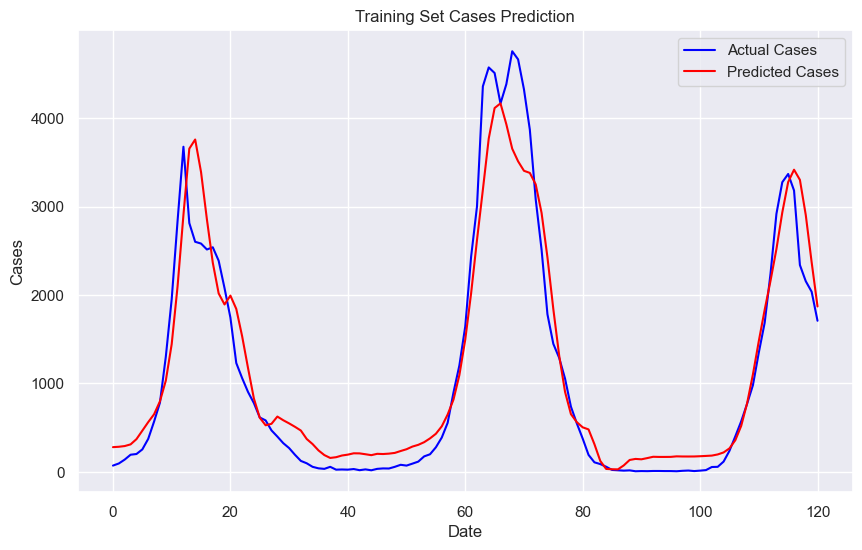

In [166]:
plt.figure(figsize=(10,6))
plt.plot(train[7:], color='blue', label='Actual Cases')
plt.plot(preds_train, color='red', label='Predicted Cases')
plt.title('Training Set Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

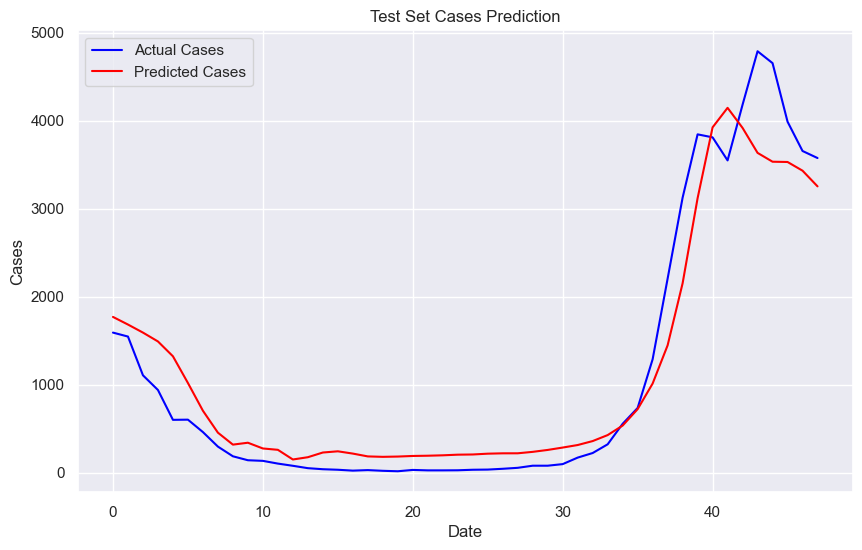

In [167]:
plt.figure(figsize=(10,6))
plt.plot(test[7:], color='blue', label='Actual Cases')
plt.plot(preds_test, color='red', label='Predicted Cases')
plt.title('Test Set Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [168]:
MSE_train = round(mean_squared_error(train[7:], preds_train),3)
RMSE_train = round(mean_squared_error(train[7:], preds_train, squared=False),3)
MAE_train = round(mean_absolute_error(train[7:], preds_train),3)

print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test[7:], preds_test),3)
RMSE_test = round(mean_squared_error(test[7:], preds_test, squared=False),3)
MAE_test = round(mean_absolute_error(test[7:], preds_test),3)

print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 135309.131
RMSE_train: 367.844
MAE_train: 261.723
MSE_test: 157786.376
RMSE_test: 397.223
MAE_test: 293.387


In [101]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [104]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [105]:
trainX

array([[0.00146229],
       [0.00334239],
       [0.00271569],
       [0.00564028],
       [0.01190725],
       [0.01002716],
       [0.00731147],
       [0.00501358],
       [0.00501358],
       [0.00793817],
       [0.00898266],
       [0.01065385],
       [0.01044496],
       [0.00584917],
       [0.01274285],
       [0.01942762],
       [0.0236056 ],
       [0.03781074],
       [0.06517652],
       [0.07791936],
       [0.13432212],
       [0.19448506],
       [0.28911636],
       [0.43137665],
       [0.51848757],
       [0.77188218],
       [0.87549614],
       [0.97200752],
       [0.83392521],
       [0.65385419],
       [0.58909547],
       [0.42678086],
       [0.31585544],
       [0.23898057],
       [0.19218717],
       [0.1401713 ],
       [0.11510341],
       [0.07415918],
       [0.04010863],
       [0.02465009],
       [0.01107165],
       [0.00480468],
       [0.00459578],
       [0.00229789],
       [0.00208899],
       [0.00167119],
       [0.00334239],
       [0.001

In [106]:
testY

array([0.00146229, 0.00250679, 0.00376018, 0.01107165, 0.01148945,
       0.0238145 , 0.04930019, 0.08355964, 0.11907249, 0.16022561,
       0.20451222, 0.28159599, 0.35199499, 0.46856069, 0.60914978,
       0.68393566, 0.70336328, 0.66429914, 0.4881972 , 0.44996867,
       0.42510967, 0.35659077, 0.31731774, 0.325047  , 0.36181324,
       0.36703572, 0.34092333, 0.33904324, 0.33820765, 0.33235847,
       0.32295801, 0.23104241, 0.19615626, 0.12533946, 0.12575726,
       0.09630249, 0.06183413, 0.03885523, 0.02945477, 0.02799248,
       0.02151661, 0.01629413, 0.01065385, 0.00814706, 0.00689367,
       0.00480468, 0.00605807, 0.00438688, 0.00334239, 0.00647587,
       0.00543138, 0.00543138, 0.00564028, 0.00689367, 0.00731147,
       0.00919156, 0.01148945, 0.01650303, 0.01650303, 0.02026321,
       0.03572175, 0.0465845 , 0.06726551, 0.115939  , 0.15354084,
       0.26906204, 0.46041362, 0.65260079, 0.80279925, 0.79569668,
       0.74096511, 0.87319825, 1.        , 0.97179862, 0.83288

In [107]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [108]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
155/155 - 1s - loss: 0.1133 - 1s/epoch - 7ms/step
Epoch 2/100
155/155 - 0s - loss: 0.0903 - 127ms/epoch - 817us/step
Epoch 3/100
155/155 - 0s - loss: 0.0804 - 121ms/epoch - 779us/step
Epoch 4/100
155/155 - 0s - loss: 0.0729 - 121ms/epoch - 781us/step
Epoch 5/100
155/155 - 0s - loss: 0.0653 - 120ms/epoch - 774us/step
Epoch 6/100
155/155 - 0s - loss: 0.0570 - 119ms/epoch - 768us/step
Epoch 7/100
155/155 - 0s - loss: 0.0488 - 128ms/epoch - 823us/step
Epoch 8/100
155/155 - 0s - loss: 0.0388 - 195ms/epoch - 1ms/step
Epoch 9/100
155/155 - 0s - loss: 0.0297 - 165ms/epoch - 1ms/step
Epoch 10/100
155/155 - 0s - loss: 0.0216 - 124ms/epoch - 799us/step
Epoch 11/100
155/155 - 0s - loss: 0.0149 - 120ms/epoch - 777us/step
Epoch 12/100
155/155 - 0s - loss: 0.0101 - 122ms/epoch - 789us/step
Epoch 13/100
155/155 - 0s - loss: 0.0071 - 123ms/epoch - 796us/step
Epoch 14/100
155/155 - 0s - loss: 0.0057 - 124ms/epoch - 799us/step
Epoch 15/100
155/155 - 0s - loss: 0.0051 - 122ms/epoch - 788us/ste

In [109]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 2ms/step
Train Score: 308.48 RMSE
Test Score: 300.17 RMSE


In [114]:
testY[0][-1]

3656.0

In [116]:
testPredict[:,0][-1]

3864.4495

In [119]:
testScore = np.sqrt(mean_squared_error(testY[0][-1].reshape(1,-1), testPredict[:,0][-1].reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 208.45 RMSE


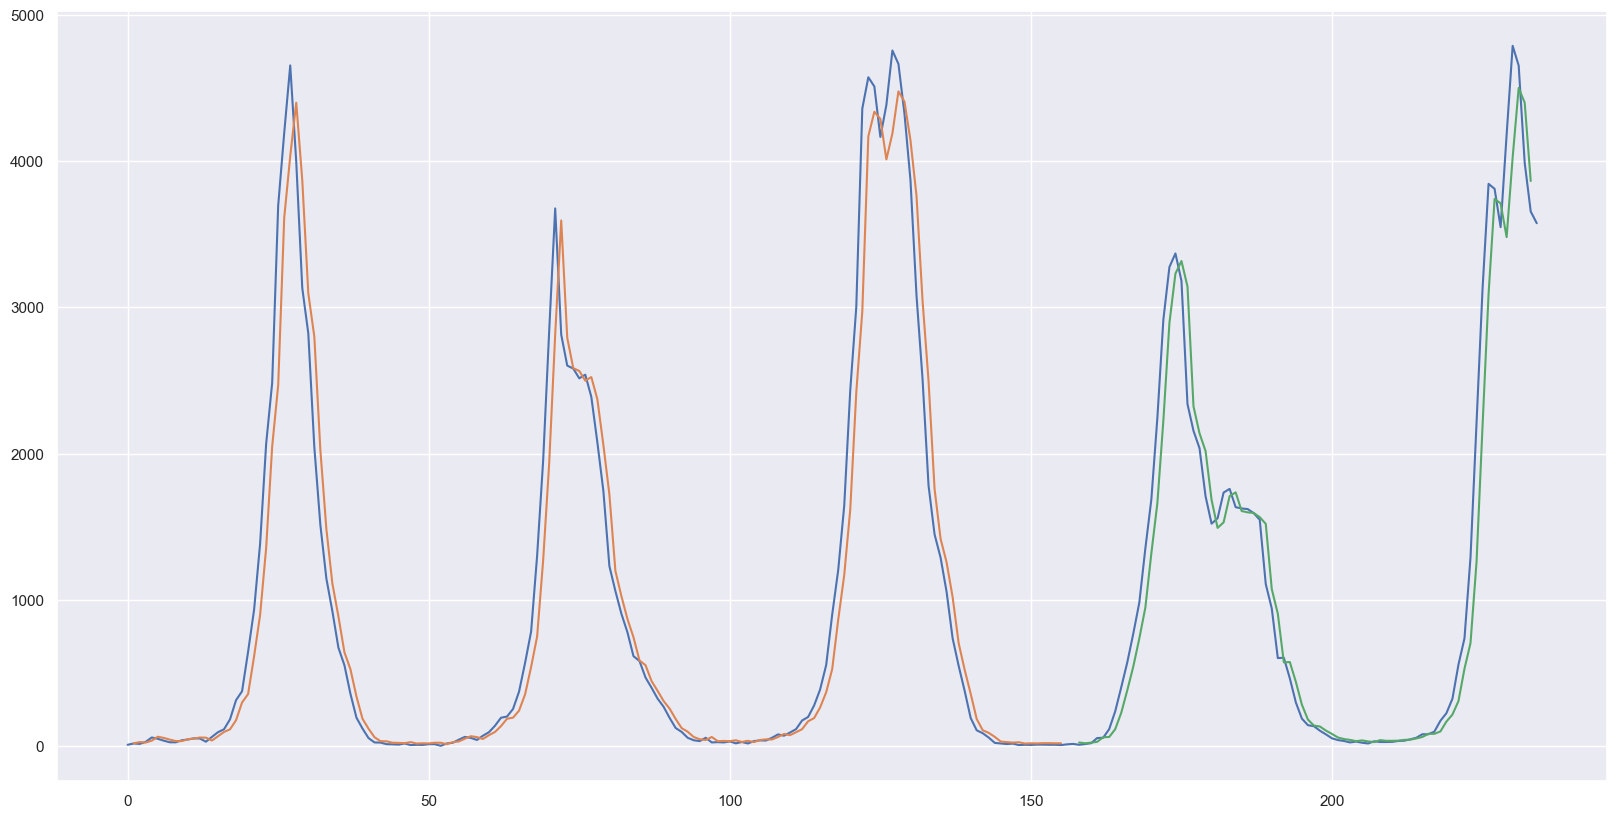

In [110]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [143]:
# import
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(2022)

# load the dataset
dataframe = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# # # split into train and test sets
# X = dataset.loc[:, dataset.columns != 'Total Cases']
# y = dataset['Total Cases']

# train_X = X[:-1]
# train_y = y[:-1]
# test_X = X[-1]
# test_y = np.asarray(y[-1])

train_size = int(len(dataset) -1)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# # calculate root mean squared error
# trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

IndexError: tuple index out of range

In [128]:
train_size

234

In [129]:
test_size

1

In [131]:
train

array([[0.00146229],
       [0.00334239],
       [0.00271569],
       [0.00564028],
       [0.01190725],
       [0.01002716],
       [0.00731147],
       [0.00501358],
       [0.00501358],
       [0.00793817],
       [0.00898266],
       [0.01065385],
       [0.01044496],
       [0.00584917],
       [0.01274285],
       [0.01942762],
       [0.0236056 ],
       [0.03781074],
       [0.06517652],
       [0.07791936],
       [0.13432212],
       [0.19448507],
       [0.28911635],
       [0.43137664],
       [0.5184876 ],
       [0.77188224],
       [0.87549615],
       [0.9720076 ],
       [0.83392525],
       [0.6538542 ],
       [0.5890955 ],
       [0.42678088],
       [0.31585544],
       [0.23898058],
       [0.19218718],
       [0.1401713 ],
       [0.1151034 ],
       [0.07415918],
       [0.04010863],
       [0.02465009],
       [0.01107165],
       [0.00480468],
       [0.00459578],
       [0.00229789],
       [0.00208899],
       [0.00167119],
       [0.00334239],
       [0.001

In [132]:
test

array([[0.7466054]], dtype=float32)

In [141]:
trainX[0]

array([0.00146229, 0.00334239, 0.00271569, 0.00564028, 0.01190725,
       0.01002716, 0.00731147], dtype=float32)

In [142]:
trainY[0]

0.0050135786

In [147]:
testX

array([], dtype=float64)

In [138]:
testY

array([], dtype=float64)